# Selekcijski zadatak : Machine Learning inženjer - CROZ 2023

Ovaj dokument sadrži programsko rješenje prva dva dijela selekcijskog zadatka. Implementirana je analiza,obrada i priprema podataka kao i odabir, treniranje i evaluacija modela.

# 1. Analiza, obrada i priprema podataka

Za potrebe rješenja ovih zadataka korištena je biblioteka "pandas" i "NumPy"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Podatkovni skup kojeg koristimo predstavlja skup podataka o vozilima. Svrha ovog zadatak je pripremiti podatkovni skup koji će se dalje koristiti za predviđanje cijene automobila. DataSet je učitan putem "pandas" biblioteke, te je spremljen u objekt "data".

In [2]:
data=pd.read_csv("data/vehicles.csv")

Pogledajmo strukturu našeg podatkovnog skupa.

In [3]:
print("The dimension of data set is : ",data.shape)

The dimension of data set is :  (426880, 26)


Podatkovni skup kojeg imamo na raspolaganju je složene prirode. Imamo preko 400 tisuća zapisa na raspolaganju, gdje svaki zapis je opisan s 26 značajki. Pogledajmo koje varijable  opisuju svaki zapis, te da li su svih 26 potrebne. 

## Brisanje značajki

In [4]:
print("Name of the columns: ",list(data.columns))

Name of the columns:  ['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'county', 'state', 'lat', 'long', 'posting_date']


Želimo predvidjeti cijenu automobila stoga već možemo vidjeti da nam neće biti potrebni baš sve varijable ovog skupa. Primjerice identifikatori zapisa kao što su "id", i "VIN" ne doprinose nikakvu korisnu informaciju. Nadalje moramo izabrati one varijable koje se čine najkorisnijim. Varijable koje ćemo izbaciti iz ovog skupa su sjedeće: 
'id', 'VIN','state','url','region',                   'region_url','posting_date','image_url','paint_color','description','lat','long

In [5]:
data=data.drop(columns=['id', 'VIN','state','url','region',
                        'region_url','posting_date','image_url','paint_color','description','lat','long'])

In [6]:
print("The dimension of data set is : ",data.shape)

The dimension of data set is :  (426880, 14)


Bilo je potrebno smanjiti dimenzionalnost i složenost našeg podatkovnog skupa. Većina izbrisani stupaca su kategoričke varijable koje bi dalje morali enkodirati za korištenje u ML modelima. Taj proces bi još više povećao složenost podatkovnog procesa, te je jednostavno bilo potrebno žrtvovati neke varijable.

## Nedostajuće vrijednosti.

Pogledajmo koliko imamo nedostajućih vrijednosti u našem skupu po značajkama. 

In [7]:
for i in range (0,14):
    numOfNaN=data.iloc[:, i].isna().sum()
    print("Column:",data.columns[i], " has: ",numOfNaN," NaN values.")
    print("That is",round((numOfNaN/data.shape[0])*100,3),"% of the DS \n")

Column: price  has:  0  NaN values.
That is 0.0 % of the DS 

Column: year  has:  1205  NaN values.
That is 0.282 % of the DS 

Column: manufacturer  has:  17646  NaN values.
That is 4.134 % of the DS 

Column: model  has:  5277  NaN values.
That is 1.236 % of the DS 

Column: condition  has:  174104  NaN values.
That is 40.785 % of the DS 

Column: cylinders  has:  177678  NaN values.
That is 41.622 % of the DS 

Column: fuel  has:  3013  NaN values.
That is 0.706 % of the DS 

Column: odometer  has:  4400  NaN values.
That is 1.031 % of the DS 

Column: title_status  has:  8242  NaN values.
That is 1.931 % of the DS 

Column: transmission  has:  2556  NaN values.
That is 0.599 % of the DS 

Column: drive  has:  130567  NaN values.
That is 30.586 % of the DS 

Column: size  has:  306361  NaN values.
That is 71.767 % of the DS 

Column: type  has:  92858  NaN values.
That is 21.753 % of the DS 

Column: county  has:  426880  NaN values.
That is 100.0 % of the DS 



Prvo vidimo da varijabla "size" ima preko 70% nedostajućih vrijednosti, a varijabla "county" čak i 100% NaN vrijednosti. Ne možemo biti tvrditi legitimnost tih stupaca zbog velike količine NaN vrijednosti, stoga najbolje što možemo učiniti je izbaciti u cijelosti iz dataseta.

In [8]:
data=data.drop(columns=['county','size'])

Najčešći načini zamijene NaN vrijednosti je zamjena s modom, srednjom vrijednosti ili medijanom. Ako radimo s kategoričkim varijablama onda je zamjena najčešćom vrijednosti(modom) najbolja.


Iz prijašnjeg ispisa vidimo da su prisutne NaN vrijednosti i dalje. U nekim varijablama prisutnost takvih vrijednosti je malena (ispod 2%). Te vrijednosti ćemo jednostavno izbrisati.

In [9]:
data = data.dropna(subset=['year', 'model', 'fuel', 'odometer','transmission','title_status'])

Ostatak varijabli zahtjeva delikatnije rješenje. Počnimo od varijable **manufacturer**

In [10]:
print("There are ",len(data['manufacturer'].unique())," different types of manufacturers")

There are  42  different types of manufacturers


In [11]:
data['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', nan, 'acura', 'hyundai', 'mercedes-benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'ferrari', 'mini',
       'pontiac', 'fiat', 'rover', 'tesla', 'saturn', 'mercury',
       'harley-davidson', 'datsun', 'aston-martin', 'land rover'],
      dtype=object)

Ova varijabla već u sebi sadrži vrijednost "others", te je najlakše pridodijeliti istu vrijednost onim zapisima koji sadrže nedostajuće vrijednosti.

In [12]:
data['manufacturer'] = data['manufacturer'].replace(np.nan, 'others')

Nadalje ova varijabla je presložena, sadrži 42 moguće vrijednosti. Zbog daljnjih koraka zadržat ćemo samo 15 najčešći vrijednosti.

In [13]:
manufacturer_values = data['manufacturer'].value_counts()
data['manufacturer'] = data['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:15] else 'others')

In [14]:
data['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'others', 'honda', 'dodge', 'subaru', 'hyundai', 'mercedes-benz',
       'bmw', 'volkswagen'], dtype=object)

Nadalje varijablu **cylinders** je također potrebno osloboditi od NaN vrijednosti. Prvo ćemo pogledati ponašanje te varijable, te promijeniti je u odgovarajući oblik

In [15]:
unique_values = data["cylinders"].unique()
value_counts = data["cylinders"].value_counts(dropna=False)

for value in unique_values:
    count = value_counts[value]
    if pd.isna(value):
        print("NaN: {}".format(count,round(count/data.shape[0],3)*100))
    else:
        print("{}: {} ".format(value,count, round(count/data.shape[0],3)*100))

8 cylinders: 68535 
6 cylinders: 89575 
NaN: 169060
4 cylinders: 73543 
5 cylinders: 1659 
other: 1033 
3 cylinders: 609 
10 cylinders: 1386 
12 cylinders: 194 


Opet imamo pojavu vrijednosti "other" s kojom možemo zamijeniti nedostajuće vrijednosti.

In [16]:
data['cylinders'] = data['cylinders'].replace(np.nan, 'other')

Nadalje želimo se riješiti vrijednosti "other", te svakom takvom zapisu pridodijeliti procjenu vrijednosti ove varijable. Procijene ćemo napraviti tako da ćemo podatkovni skup grupirati po proizvođaču te pronaći najučestaliju vrijednost ove varijable svakog proizvođača. Na temelju toga onda dodijeliti tu vrijednost polju s "other" vrijednosti. Također u ovom koraku ćemo pretvoriti ovaj stupac u tip int jer će nam poslije trebati takav tip za ovu varijablu.

In [17]:
## Group by manufactuer and find the average numb of cilinders for that manufactuer.
import warnings
warnings.filterwarnings('ignore')

## Group by manufactuer and find the average numb of cilinders for that manufactuer.
definedCylinders = data[data['cylinders'] != 'other']
definedCylinders['cylinders'] = definedCylinders['cylinders'].str.replace("cylinders","")
print(definedCylinders["cylinders"].unique())

definedCylinders['cylinders'] = definedCylinders['cylinders'].astype(int)

manufactuers=definedCylinders["manufacturer"].unique()
AverageNumOfCylinders={}

for manu in manufactuers:
    #Get the subset of that manufactuer
    manuSubset=definedCylinders[definedCylinders["manufacturer"] == manu]
    # Get the average number of cylinders for that column.
    avgNumOfCyl=manuSubset["cylinders"].mode()
    AverageNumOfCylinders[manu]=int(round(avgNumOfCyl,0))

print(AverageNumOfCylinders)
data['cylinders'] = data['cylinders'].str.replace("cylinders","")


['8 ' '6 ' '4 ' '5 ' '3 ' '10 ' '12 ']
{'gmc': 8, 'chevrolet': 8, 'toyota': 4, 'ford': 8, 'jeep': 6, 'nissan': 4, 'ram': 8, 'honda': 4, 'dodge': 6, 'others': 6, 'subaru': 4, 'mercedes-benz': 6, 'bmw': 6, 'volkswagen': 4, 'hyundai': 4}


In [18]:
for manu in manufactuers:
    data.loc[(data["manufacturer"]==manu) & (data["cylinders"]=='other'),['cylinders']]=AverageNumOfCylinders[manu]

data['cylinders'] = data['cylinders'].astype(int)
data["cylinders"].unique()

array([ 8,  6,  4,  5,  3, 10, 12])

Isti način zamijene nedostajuće vrijednosti s najdominantnijom tog proizvođača ćemo upotrijebiti i na varijablu "drive".

In [19]:
## Group by manufactuer and find the average numb of cilinders for that manufactuer.
definedDrive = data[data['drive'].notna()]
print("Unique drive values: ",definedDrive["drive"].unique())

Unique drive values:  ['rwd' '4wd' 'fwd']


In [20]:
unique_values = data["drive"].unique()
value_counts = data["drive"].value_counts(dropna=False)

for value in unique_values:
    count = value_counts[value]
    if pd.isna(value):
        print("NaN: {} ".format(count))
    else:
        print("{}: {} ".format(value,count))

NaN: 121945 
rwd: 56795 
4wd: 125365 
fwd: 101489 


In [21]:
#Get the most common value per manufactuer
manufactuers=definedDrive["manufacturer"].unique()
MostCommonDrivePerManu={}

for manu in manufactuers:
    #Get the subset of that manufactuer
    manuSubset=definedDrive[definedDrive["manufacturer"] == manu]
    # Get the average number of cylinders for that column.
    most_common_value = manuSubset["drive"].value_counts().idxmax()
    MostCommonDrivePerManu[manu]=most_common_value

print(MostCommonDrivePerManu)


{'ford': '4wd', 'gmc': '4wd', 'chevrolet': '4wd', 'toyota': 'fwd', 'jeep': '4wd', 'nissan': 'fwd', 'others': 'fwd', 'honda': 'fwd', 'dodge': 'rwd', 'hyundai': 'fwd', 'ram': '4wd', 'mercedes-benz': 'rwd', 'bmw': 'rwd', 'volkswagen': 'fwd', 'subaru': '4wd'}


In [22]:
for manu in manufactuers:
    data.loc[(data["manufacturer"]==manu) & (data["drive"].isna()),['drive']]=MostCommonDrivePerManu[manu]


In [23]:
unique_values = data["drive"].unique()
value_counts = data["drive"].value_counts(dropna=False)

for value in unique_values:
    count = value_counts[value]
    if pd.isna(value):
        print("NaN: {} ".format(count))
    else:
        print("{}: {}".format(value,count))

4wd: 173316
fwd: 161447
rwd: 70831


Oslobodili smo varijablu **drive** od nedostajućih vrijednosti. Isto moramo napraviti i za varijablu **type**

In [24]:
data['type'].unique()

array(['pickup', 'truck', 'other', nan, 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

Opet vidimo prisutnost vrijednosti **other** u našem skupu, te s njom možemo zamijeniti nedostajuće vrijednosti.

In [25]:
unique_values = data["type"].unique()
value_counts = data["type"].value_counts(dropna=False)

for value in unique_values:
    count = value_counts[value]
    if pd.isna(value):
        print("NaN: {} ".format(count,round(count/data.shape[0],3)*100))
    else:
        print("{}: {} ".format(value,count, round(count/data.shape[0],3)*100))

pickup: 41232 
truck: 33769 
other: 20163 
NaN: 88729 
coupe: 18521 
SUV: 72665 
hatchback: 16175 
mini-van: 4696 
sedan: 83092 
offroad: 587 
bus: 505 
van: 7701 
convertible: 7461 
wagon: 10298 


In [26]:
data['type'] = data['type'].replace(np.nan, 'other')

Posljednja varijabla koja traži rukovanje s null vrijednostima je condition

In [27]:
data['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', nan, 'new', 'salvage'],
      dtype=object)

Prilikom zamijene NaN vrijednosti uzet ćemo u obzir starost vozila i vrijednost varijable "odometar". Grupirat ćemo skup u nove,stare i aute srednje dobi. Te unutar tih podskupova napraviti podjelu po tome kolika je vrijednost varijable odometar [higherODM, lowerODM]. Unutar tih 6 podjela izračunat ćemo mode varijable **condition** koje ćemo onda poslije koristiti za zamjenu NaN vrijednosti.

In [28]:
newCars=data[data['year']>2015]
midCars=data[(data['year'] <=2015) &  (data['year'] > 2002) ]
oldCars=data[data['year'] <= 2002]

In [29]:
OldCarCondition={}
oldCars_copy=oldCars.dropna(subset=['condition'])

OldCarCondition["higherODM"]=oldCars_copy[oldCars_copy['odometer']>oldCars_copy['odometer'].median()]['condition'].value_counts().idxmax()
OldCarCondition["lowerODM"]=oldCars_copy[oldCars_copy['odometer']<=oldCars_copy['odometer'].median()]['condition'].value_counts().idxmax()
print("Older cars: ",OldCarCondition)


MidCarCondition={}
midCars_copy=midCars.dropna(subset=['condition'])

MidCarCondition["higherODM"]=midCars_copy[midCars_copy['odometer']>midCars_copy['odometer'].median()]['condition'].value_counts().idxmax()
MidCarCondition["lowerODM"]=midCars_copy[midCars_copy['odometer']<=midCars_copy['odometer'].median()]['condition'].value_counts().idxmax()
print("Mid cars: ",MidCarCondition)


NewCarCondition={}
newCars_copy=newCars.dropna(subset=['condition'])

NewCarCondition["higherODM"]=newCars_copy[newCars_copy['odometer']>newCars_copy['odometer'].median()]['condition'].value_counts().idxmax()
NewCarCondition["lowerODM"]=newCars_copy[newCars_copy['odometer']<=newCars_copy['odometer'].median()]['condition'].value_counts().idxmax()
print("New cars:",NewCarCondition)


Older cars:  {'higherODM': 'good', 'lowerODM': 'excellent'}
Mid cars:  {'higherODM': 'excellent', 'lowerODM': 'excellent'}
New cars: {'higherODM': 'good', 'lowerODM': 'good'}


In [30]:
data.loc[(data['year']>2015) & (data['odometer']>newCars_copy['odometer'].median()) & (data['condition'].isna()),['condition']]=NewCarCondition["higherODM"]
data.loc[(data['year']>2015) & (data['odometer']<=newCars_copy['odometer'].median()) & (data['condition'].isna()),['condition']]=NewCarCondition["lowerODM"]

data.loc[(data['year'] <=2015) &  (data['year'] > 2002) & (data['odometer']>midCars_copy['odometer'].median()) & (data['condition'].isna()),['condition']]=MidCarCondition["higherODM"]
data.loc[(data['year'] <=2015) &  (data['year'] > 2002) & (data['odometer']<=midCars_copy['odometer'].median()) & (data['condition'].isna()),['condition']]=MidCarCondition["lowerODM"]

data.loc[(data['year'] <= 2002) & (data['odometer']>oldCars_copy['odometer'].median()) & (data['condition'].isna()),['condition']]=OldCarCondition["higherODM"]
data.loc[(data['year'] <= 2002) & (data['odometer']<=oldCars_copy['odometer'].median()) & (data['condition'].isna()),['condition']]=OldCarCondition["lowerODM"]

In [31]:
unique_values = data["condition"].unique()
value_counts = data["condition"].value_counts(dropna=False)

for value in unique_values:
    count = value_counts[value]
    if pd.isna(value):
        print("NaN: {} times {}".format(count,round(count/data.shape[0],3)*100))
    else:
        print("{}: {} times {}".format(value,count, round(count/data.shape[0],3)*100))

good: 185401 times 45.7
excellent: 190901 times 47.099999999999994
fair: 6517 times 1.6
like new: 20936 times 5.2
new: 1257 times 0.3
salvage: 582 times 0.1


## Stršeće vrijednosti.

Pogledajmo prvo pobliže naš podatkovni skup.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405594 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         405594 non-null  int64  
 1   year          405594 non-null  float64
 2   manufacturer  405594 non-null  object 
 3   model         405594 non-null  object 
 4   condition     405594 non-null  object 
 5   cylinders     405594 non-null  int32  
 6   fuel          405594 non-null  object 
 7   odometer      405594 non-null  float64
 8   title_status  405594 non-null  object 
 9   transmission  405594 non-null  object 
 10  drive         405594 non-null  object 
 11  type          405594 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(8)
memory usage: 38.7+ MB


Ispitajmo prvo prisutnost stršećih vrijednosti u numeričkim vrijednostima. Započnimo s varijablom **price**

In [33]:
data['price'].describe()

count    4.055940e+05
mean     6.276877e+04
std      1.122406e+07
min      0.000000e+00
25%      5.994000e+03
50%      1.399500e+04
75%      2.659000e+04
max      3.736929e+09
Name: price, dtype: float64

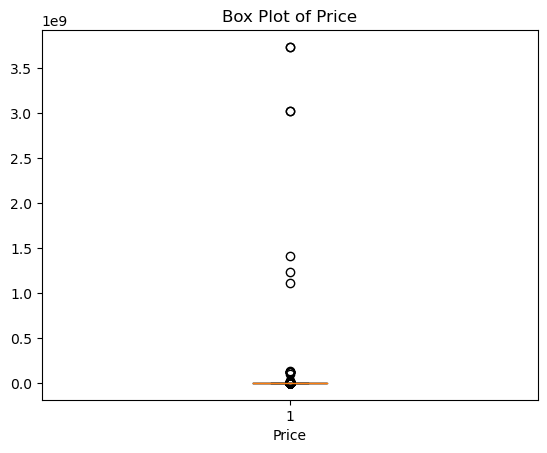

In [34]:
# Create a box plot
plt.boxplot(data['price'])

# Set the title and labels
plt.title('Box Plot of Price')
plt.xlabel('Price')

# Display the plot
plt.show()

Prisutnost outlier-a je kristalno jasna za varijablu price. Ovo je veoma problematično jer ovu varijablu je potrebno procijeniti. Zbog toga potrebno je izbrisati ekstremne slučajeve.

In [35]:
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3 - q1

lower_bound = data['price'].quantile(0.2) 
upper_bound = q3 + 1.5 * iqr

df_without_outliers = data[(data['price'] < upper_bound) & (data['price'] > lower_bound)]

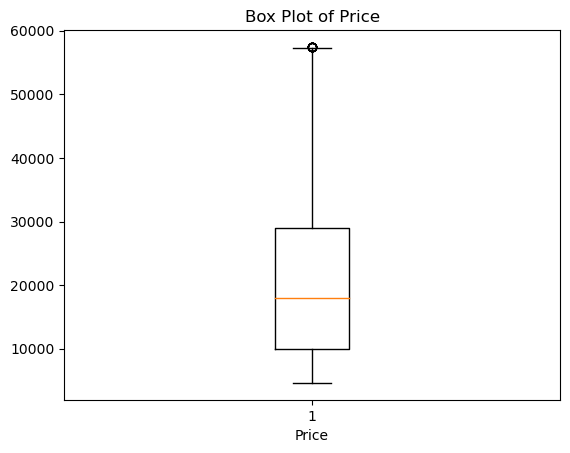

In [36]:
# Create a box plot
plt.boxplot(df_without_outliers['price'])

# Set the title and labels
plt.title('Box Plot of Price')
plt.xlabel('Price')

# Display the plot
plt.show()

Vidljivo je poboljšanje u odnosu na prijašnji graf. Potrebno je spremiti te promijene.

In [37]:
data=df_without_outliers

Isto moramo napraviti i za varijablu **odometar**

In [38]:
data['odometer'].describe()

count    3.169120e+05
mean     8.988550e+04
std      1.422665e+05
min      0.000000e+00
25%      3.577775e+04
50%      8.052050e+04
75%      1.260000e+05
max      1.000000e+07
Name: odometer, dtype: float64

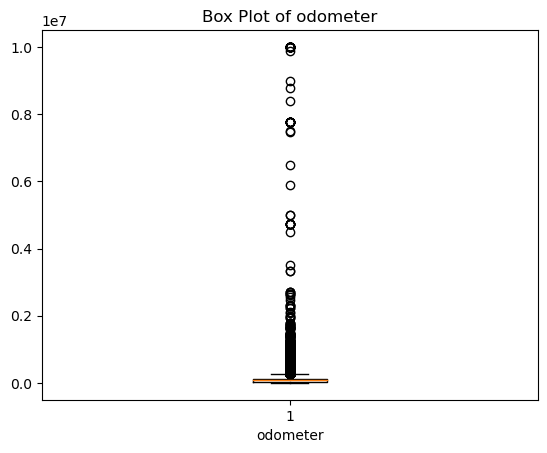

In [39]:
# Create a box plot
plt.boxplot(data['odometer'])

# Set the title and labels
plt.title('Box Plot of odometer')
plt.xlabel('odometer')

# Display the plot
plt.show()

Još jedna varijabla s izraženim outlierima. Za uklanjanje upotrijebit ćemo IQR metodu

In [40]:
# Method 2: IQR Method
q1 = data['odometer'].quantile(0.25)
q3 = data['odometer'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_without_outliers = data[(data['odometer'] < upper_bound) & (data['odometer'] > lower_bound)]

In [41]:
data=df_without_outliers

Pogledajmo sada ponašanje diskretne varijable **year**

In [42]:
unique_values = data["year"].unique()
value_counts = data["year"].value_counts(dropna=False)
unique_values.sort()
reallyOldCars=data[data['year']<1990]
newCarsCars=data[data['year']>=1990]

print("There are ",reallyOldCars.shape[0]," cars older than 1990")
print("There are ",newCarsCars.shape[0] ," that were manufactured after 1990") 


There are  8116  cars older than 1990
There are  305680  that were manufactured after 1990


Većina zapisa su noviji automobili, stoga starije automobile možemo smatrati kao stršećim vrijednostima te fokusirati se samo na novije zapise.

In [43]:
data=data[data['year']>=1990]

In [44]:
data.shape

(305680, 12)

Gotovi smo s analizom podataka, sada je potrebno kategoričke podatke obraditi kako bismo ih mogli koristi prilikom ML modela.

## Obrada podataka

Pogledajmo s kakvim tipovima podataka radimo.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305680 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         305680 non-null  int64  
 1   year          305680 non-null  float64
 2   manufacturer  305680 non-null  object 
 3   model         305680 non-null  object 
 4   condition     305680 non-null  object 
 5   cylinders     305680 non-null  int32  
 6   fuel          305680 non-null  object 
 7   odometer      305680 non-null  float64
 8   title_status  305680 non-null  object 
 9   transmission  305680 non-null  object 
 10  drive         305680 non-null  object 
 11  type          305680 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(8)
memory usage: 29.2+ MB


Tip "object", nažalost nije podržan za regresijski model strojnog učenja s toga je potrebno detaljnije obradit te varijable.

Procedura obrade koju je potrebno obradit se zove **ENCODING** , te koristi ćemo **ONE-HOT ENCODING** i **ORDINAL ENCODING**

One-hot encoding je tehnika pretvorbe kategoričkih varijabli u numerički oblik kako bi ih bilo moguće koristiti u strojnom učenju ili analizi podataka. Kada se koristi one-hot encoding, svaka jedinstvena vrijednost kategoričke varijable predstavljena je kao posebna binarna varijabla.

Na primjer, ako imamo kategoričku varijablu "boja" s mogućim vrijednostima "crvena", "plava" i "zelena", one-hot encoding će pretvoriti tu varijablu u tri nova stupca: "crvena", "plava" i "zelena". Za svaki redak podataka, samo jedan od tih stupaca će imati vrijednost 1, dok će ostali biti postavljeni na 0.

Ova tehnika omogućava strojnom učenju da tretira kategoričke varijable kao numeričke, što je često potrebno jer mnogi algoritmi strojnog učenja rade samo s numeričkim podacima. One-hot encoding također pomaže u izbjegavanju pretpostavki o redoslijedu ili rasporedu kategoričkih vrijednosti, jer se svaka vrijednost tretira kao neovisna varijabla.

One-hot encoding se može primijeniti na različite kategoričke varijable, poput boja, kategorija proizvoda, regija ili bilo kojeg drugog atributa koji je diskretne prirode.

Započnimo s varijablom **manufacturer**

In [46]:
data_copy=data.copy()
manufacturer_encoded = pd.get_dummies(data['manufacturer'], prefix='manufacturer',dtype=int64)

# Concatenate the encoded columns with the original DataFrame
data_copy = pd.concat([data, manufacturer_encoded], axis=1)

# Drop the original 'manufacturer' column if desired
data_copy.drop('manufacturer', axis=1, inplace=True)

data_copy=data_copy.reset_index(drop=True)

Varijablu **condition** ćemo obraditi putem **Ordinal Encoding** operacije. Razlog zašto se ovdje koristi Ordinal encoding je taj što postoji hijerarhijski odnos između vrijednosti ove varijable.

Ordinal encoding je tehnika pretvorbe kategoričkih varijabli u numerički oblik, ali za razliku od one-hot encodinga, zadržava informaciju o redoslijedu ili rasporedu kategoričkih vrijednosti. Kod ordinal encodinga, svakoj jedinstvenoj vrijednosti kategoričke varijable dodjeljuje se jedan odgovarajući brojčani kod.

Na primjer, ako imamo kategoričku varijablu "veličina" s mogućim vrijednostima "mali", "srednji" i "veliki", ordinal encoding bi mogao dodijeliti brojevne kodove "0", "1" i "2" tim vrijednostima, respektivno. Ova tehnika zadržava informaciju o relativnom redoslijedu veličina, tako da će algoritmi strojnog učenja koji koriste takve kodirane vrijednosti moći razumjeti tu hijerarhiju.

Ordinal encoding je koristan kada postoji prirodan redoslijed ili raspored među kategoričkim vrijednostima. Na primjer, rangiranje ocjena od "loše" do "izvrsno" ili stupnjevanje starosti od "mlad" do "star". Ova tehnika je jednostavna za primjenu i može biti korisna u mnogim scenarijima analize podataka.

In [47]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to encode
column_data = data_copy[['condition']]

# Define the order of categories
category_order = ['new', 'like new', 'excellent','good','fair','salvage']

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']])

# Fit and transform the column data
encoded_data = encoder.fit_transform(column_data)

# Create a new DataFrame with the encoded values
df_encoded = pd.DataFrame(encoded_data, columns=['condition'])
data_copy.drop('condition', axis=1, inplace=True)
# Concatenate the encoded DataFrame with the original DataFrame
data_copy = pd.concat([data_copy, df_encoded],axis=1)


Varijable **fuel**,**type**,**transmission**,**drive** ćemo također obraditi putem OHE operacije.

In [48]:
#FUEL
data_copy=data_copy.reset_index(drop=True)
fuel_encoded = pd.get_dummies(data_copy['fuel'], prefix='fuel',dtype=int64)

# Concatenate the encoded columns with the original DataFrame
data_copy = pd.concat([data_copy, fuel_encoded], axis=1)

# Drop the original 'fuel' column if desired
data_copy.drop('fuel', axis=1, inplace=True)

#TYPE
data_copy=data_copy.reset_index(drop=True)
type_encoded = pd.get_dummies(data_copy['type'], prefix='type',dtype=int64)

# Concatenate the encoded columns with the original DataFrame
data_copy = pd.concat([data_copy, type_encoded], axis=1)

# Drop the original 'manufacturer' column if desired
data_copy.drop('type', axis=1, inplace=True)

#TRANSMISSION
data_copy=data_copy.reset_index(drop=True)
trans_encoded = pd.get_dummies(data_copy['transmission'], prefix='transmission',dtype=int64)

# Concatenate the encoded columns with the original DataFrame
data_copy = pd.concat([data_copy, trans_encoded], axis=1)

# Drop the original 'manufacturer' column if desired
data_copy.drop('transmission', axis=1, inplace=True)

#DRIVE
data_copy=data_copy.reset_index(drop=True)
drive_encoded = pd.get_dummies(data_copy['drive'], prefix='drive',dtype=int64)

# Concatenate the encoded columns with the original DataFrame
data_copy = pd.concat([data_copy, drive_encoded], axis=1)

# Drop the original 'manufacturer' column if desired
data_copy.drop('drive', axis=1, inplace=True)


In [49]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305680 entries, 0 to 305679
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   price                       305680 non-null  int64  
 1   year                        305680 non-null  float64
 2   model                       305680 non-null  object 
 3   cylinders                   305680 non-null  int32  
 4   odometer                    305680 non-null  float64
 5   title_status                305680 non-null  object 
 6   manufacturer_bmw            305680 non-null  int64  
 7   manufacturer_chevrolet      305680 non-null  int64  
 8   manufacturer_dodge          305680 non-null  int64  
 9   manufacturer_ford           305680 non-null  int64  
 10  manufacturer_gmc            305680 non-null  int64  
 11  manufacturer_honda          305680 non-null  int64  
 12  manufacturer_hyundai        305680 non-null  int64  
 13  manufacturer_j

Pogledajmo pobliže varijablu **title_status**

In [50]:
data_copy['title_status'].unique()

array(['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'],
      dtype=object)

Veoma je slična varijabli **condition** koju smo već obradili, stoga ćemo ju izostaviti. 

In [51]:
data_copy.drop('title_status', axis=1, inplace=True)

Pogledajmo magnitudu varijable **model**

In [52]:
len(data_copy['model'].unique())

19325

**Model** varijabla može biti odličan prediktor cijene jednog automobila, ali zbog ogromne količine različitih modela u našem skupu moramo izbrisati ovu varijablu.

In [53]:
data_copy.drop('model', axis=1, inplace=True)

## Keriranje značajki

Prvenstveno uvest ćemo značajku **age** koja će predstavljati starost vozila.

In [54]:
data_copy['age'] = 2023.0 - data_copy['year']

In [55]:
data_copy['age']=data_copy['age'].astype(int)
data_copy['year']=data_copy['year'].astype(int)

Pogledajmo postoji li korelacija između naših varijabli visoka kolinearnost

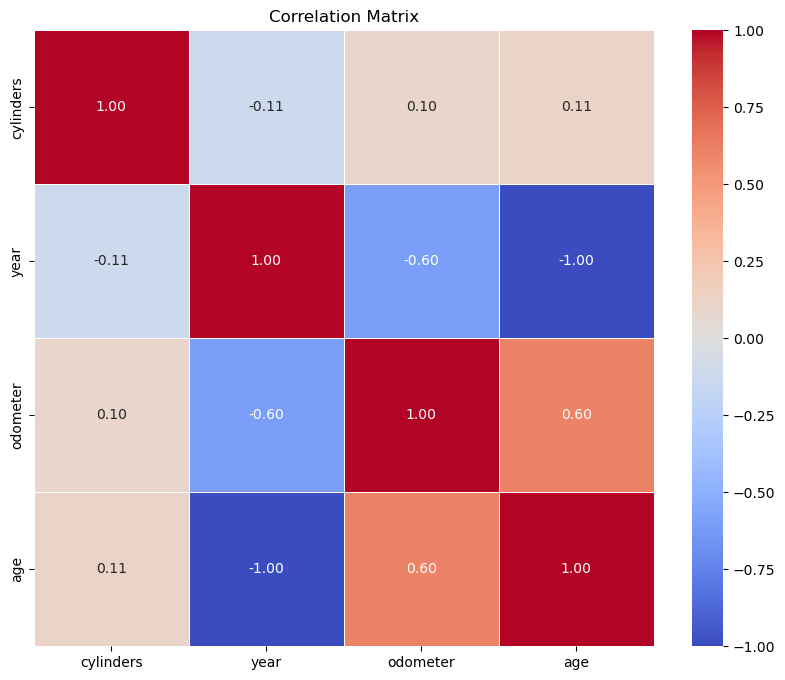

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with your data

subset=data_copy[['cylinders','year','odometer','age']]
# Calculate the correlation matrix
corr_matrix = subset.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Najveća korelacija je između značajki **age** i **odometer**, stoga ćemo stvoriti novu značajku koja će povezati te dvije vrijednosti. 

In [57]:
data_copy['odometer*age']=round(data_copy['odometer']/data_copy['age'],2)

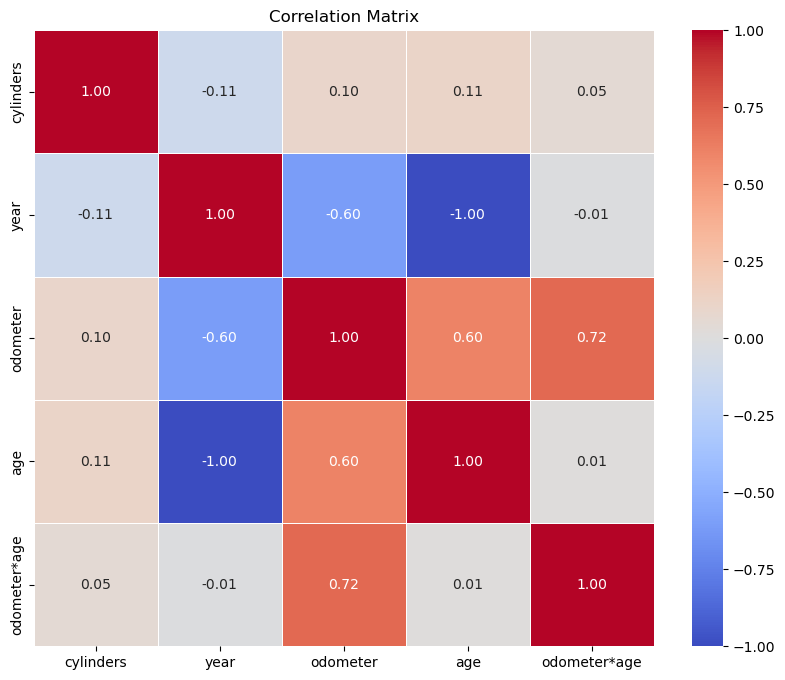

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with your data

subset=data_copy[['cylinders','year','odometer','age','odometer*age']]
# Calculate the correlation matrix
corr_matrix = subset.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Zbog velike korelacije i redundantnosti između značajki **odometer** i **ageXodometer** izbacit ćemo varijablu **odometer**

In [59]:
data_copy.drop('odometer', axis=1, inplace=True)

## Normalizacija varijabli

Imamo varijable različite magnitude u našem skupu.Potrebno je normalizirati te značajke kako bi naš model što bolje predviđao cijenu automobila.

In [60]:
# Create an instance of StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(data_copy[['age']])
# Transform the data using the scaler
data_copy['age'] = scaler.transform(data_copy[['age']])

# Fit the scaler to the data
#scaler.fit(data_copy[['odometer']])
# Transform the data using the scaler
#data_copy['odometer'] = scaler.transform(data_copy[['odometer']])

# Fit the scaler to the data
scaler.fit(data_copy[['year']])
# Transform the data using the scaler
data_copy['year'] = scaler.transform(data_copy[['year']])

 #Fit the scaler to the data
scaler.fit(data_copy[['odometer*age']])
# Transform the data using the scaler
data_copy['odometer*age'] = scaler.transform(data_copy[['odometer*age']])



## Podijela na skup za testiranje i treniranje

U ovom koraku je potrebno podijeliti skup na train, test i takvog ga poslati dalje na treniranje modela.
Odabrana je 70:30 podjela, te GridSearch će biti obavljen na train setu u svrhu pronalaska najboljeg modela.

In [61]:
y=data_copy['price']
X=data_copy.drop('price',axis=1)

X=X.sort_index(axis=1)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Treniranje i odabir modela strojnog učenja

## Linear Regression

In [63]:
# Create and train the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model using mean squared error
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

# Print the mean squared error
print("Train Mean Squared Error:", train_error)
print("Test Mean Squared Error:", test_error) 


r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_test_pred)


# Print the evaluation metrics
print("Train MAE:", mae_train)
print("Test MAE:", mae_test)
print("Test R2 Score:", r2_test)

Train Mean Squared Error: 49537644.03905812
Test Mean Squared Error: 48947515.74145314
Train MAE: 5283.322544350768
Test MAE: 5253.895983272268
Test R2 Score: 0.6586534454173778


## Ridge Regression

In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the Ridge regression model
ridge = Ridge()

# Define the hyperparameter grid for GridSearchCV
param_grid = {'alpha': [0.1, 1.0,5.0, 10.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_ridge_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_ridge_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and model performance
print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Best Hyperparameters: {'alpha': 5.0}
Mean Squared Error: 48947504.22237762
R2 Score: 0.6586535257482522


## Lasso Regression

In [65]:
from sklearn.linear_model import Lasso

# Create an instance of Lasso Regression
lasso_model = Lasso(tol=0.001)

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.1, 1.0,5.0, 10.0]}  # Example values, adjust as needed

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_Lasso_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_Lasso_model.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the results
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

Best Parameters: {'alpha': 0.1}
Mean Squared Error: 48947445.27482068
R2 Score: 0.6586539368323524
RMSE: 6996.245083959015
MAE: 5252.910357493012
R-squared: 0.6586539368323524


## Decision Tree Regression

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Create an instance of Decision Tree Regression
dt_model = DecisionTreeRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {'max_depth': [7,9,12,15]}  # Example values, adjust as needed

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_DTR_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_DTR_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the results
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

Mean Squared Error: 27822464.7550223
Best Parameters: {'max_depth': 15}
R2 Score: 0.8059737590302197
RMSE: 5274.700442207339
MAE: 3402.7241212185686
R-squared: 0.8059737590302197


## Random Forest Regression

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Create an instance of Random Forest Regression
rf_model = RandomForestRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10,20],  # number of trees in the forest
    'max_depth': [7,9,12,15]  # maximum depth of the trees
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_RFR_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_RFR_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the results
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


Mean Squared Error: 23255159.576903023
Best Parameters: {'max_depth': 15, 'n_estimators': 20}
R2 Score: 0.8378248931002998
RMSE: 4822.360374018414
MAE: 3199.662336034878
R-squared: 0.8378248931002998


## KNN Regressor

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Create an instance of KNN Regression
knn_model = KNeighborsRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3,5,7]  # number of neighbors
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_knn_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_knn_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the results
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)



Mean Squared Error: 20424662.310206987
Best Parameters: {'n_neighbors': 3}
R2 Score: 0.8575640049858899
R2 Score: 0.8575640049858899
RMSE: 4519.365255232972
MAE: 2361.021005990287
R-squared: 0.8575640049858899


## ElasticNet Regression

In [69]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Create an instance of ElasticNet Regression
elasticnet_model = ElasticNet()

# Define the parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # regularization parameter
    'l1_ratio': [0.2, 0.5, 0.8]  # mixing parameter between L1 and L2 penalties
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=elasticnet_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_ELM_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_ELM_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the results
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


Mean Squared Error: 49927801.27993913
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.8}
R2 Score: 0.6518172028420273
RMSE: 7065.96074712697
MAE: 5314.189424546089
R-squared: 0.6518172028420273


## Save the best model

KNN Regressor se pokazao kao najbolji model. Potrebno je taj model spremiti, te ga integrirati u API.

In [70]:
import pickle

# Save the model to a file
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_knn_model, file)